## Introduction

Our overall metric was essnetial liveability. This was determined with three indivdual metrics of supermarket availability, walkability score, and access to community gardens, as these metrics provide for basic standards of living: access to food and mobility. We analyzed these three datasets to determien the overall neighborhood as determined by liveability.

### Supermarkets

This metric determines the number of supermarkets per neighborhood, with higher levels having greater preference as more access to food is an advantage when determining which neighborhood to live in.

In [1]:
import pandas as pd
import numpy as np 
import geopandas

In [2]:
supermarket = pd.read_csv("https://data.wprdc.org/datastore/dump/626357fa-c95d-465f-9a02-3121655b2b78", 
                          index_col = "Client ID",
                          parse_dates = True) 
supermarket.sample()

,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category
Client ID,,,,,,,,,,,
200808260002,Frick Park Market,Frick Park Market LLC,8/11/2008,7103,Reynolds St,PA,15208.0,40.447214,-79.905123,9.0,Convenience Store


We used a query mask to separate "supermarkets" from "convenience stores" as conveince stores typically provide snacks and limited actual food products with low access to necessities for cooking and nutrition.

In [3]:
query_mask = supermarket["Category"] == "Supermarket"
only_supermarket = supermarket[query_mask]
only_supermarket.head()

,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category
Client ID,,,,,,,,,,,
Client ID,Aldi #92,Aldi Inc,8/18/2015,5239,Brownsville Rd,PA,15236.0,40.342387,-79.984112,9.0,Supermarket
201508270013,Aldi,Aldi Inc,9/22/2015,7350,Saltsburg Rd,PA,15235.0,40.477243,-79.785988,9.0,Supermarket
201509280005,Aldi #56,Aldi Inc,7/17/2006,2348,Ardmore Blvd,PA,15221.0,40.415887,-79.848706,9.0,Supermarket
200607310002,Aldi #68,Aldi Inc,7/16/2010,4578,Wm Flynn Hi,PA,15101.0,40.571191,-79.952845,3.0,Supermarket
201007230007,Aldi #72,Aldi Inc,11/18/2010,3089,Sussex Av,PA,15226.0,40.383771,-80.014178,9.0,Supermarket


We used the neighborhood dataset to use sort the given coordinates into neighborhood names.

In [4]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.head()

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,shape_ar_1,page_numbe,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,7.843108e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,1.390463e+07,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,5.999801e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,7.202139e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.203337e+06,15697.914337,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,1.694785e+07,15,Andrea Lavin Kossis,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.694875e+07,24019.532672,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


In [5]:
import matplotlib.path as mplpath
from geopy.geocoders import Nominatim

In [6]:
geolocator = Nominatim(user_agent="cmpinf10-alex")

Here it starts getting complicated. The dataset provides unorganized information where "neighborhood" is on a different line for each separate entity with no apparent pattern as to which line it would appear on, meaning we could not sort by line to output just the neighborhood. Instead, we manually counted up the number of times a grocery store appears in a neighborhood. Then we noticed noticed some of the data did not inlclude supermarkets, but were rather places like residental addresses or non-food/non-store businesses. Because we manually counted the supermarkets per neighborhood, we could discard this faulty data.

In [7]:
s_neighborhoods = list()
for index, row in only_supermarket.iterrows():
    location = geolocator.reverse("{}, {}".format(row['Lat'], row['Lon']))
    geo_string = location.address.split(",")
    s_neighborhoods.append(geo_string[0:9])

For purpose of presentation, we will not display the long list of supermarket's geographic data, but will instead show the counts of supermarkets per neighborhood (list displayed on Alex's notebook)

In [8]:
Lincoln_Lemington_Belmar = 2
Richland_Township = 2
Friendship = 1
South_Side_Flats = 2
Ross_Township = 1
Verona = 2
Robinson_Township = 1
Harrison_Township = 2
Coraopolis = 1
Carrick = 1
North_Oakland = 1
Strip_district = 2
Mount_Lebanon = 0
Marshall_Township = 3
Monroeville = 5
Brentwood = 1
Bloomfield = 3
Brookline = 2
Pleasant_Hills = 2
Whitehall = 2
McKeesport = 2
Shadyside = 2
Tarentum = 1
North_versailles = 1
Versailles = 2
Beechcliff = 2
West_mifflin = 5
McCandless = 1
East_Liberty = 3
West_deer_township = 1
Crafton = 1
Wilkinsburg = 1
White_oak = 1
Mt_Nebo_Pointe = 1
Frazer_township = 1
Crawford_Roberts = 1
Hampton_township = 1
Penn_Hills = 2
Baldwin = 1
Homestead = 1
West_homestead = 1
Carnegie = 1
Mount_Washington = 1
Elizabeth_township = 1
East_allegheny = 1
Upper_Lawrenceville = 1
Point_Breeze_North = 1
Moon_Township = 1
Bethel_Park = 2
West_View_Park = 1
Squirrel_Hill_South = 1

Below the data is set into a list and put in descending order to create a bar graph.

In [9]:
market_list = [Lincoln_Lemington_Belmar, Richland_Township, Friendship, South_Side_Flats, Ross_Township, Verona,
               Robinson_Township, Harrison_Township, Coraopolis, Carrick, North_Oakland, Strip_district, Mount_Lebanon,
               Marshall_Township, Monroeville, Brentwood, Bloomfield, Brookline, Pleasant_Hills, Whitehall, McKeesport,
               Shadyside, Tarentum, North_versailles, Versailles, Beechcliff, West_mifflin, McCandless, East_Liberty,
               West_deer_township, Crafton, Wilkinsburg, White_oak, Mt_Nebo_Pointe, Frazer_township, Crawford_Roberts,
               Hampton_township, Penn_Hills, Baldwin, Homestead, West_homestead, Carnegie, Mount_Washington,
               Elizabeth_township, East_allegheny, Upper_Lawrenceville, Point_Breeze_North, Moon_Township, Bethel_Park,
               West_View_Park, Squirrel_Hill_South]
print(sorted(market_list, reverse=True))

[5, 5, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]


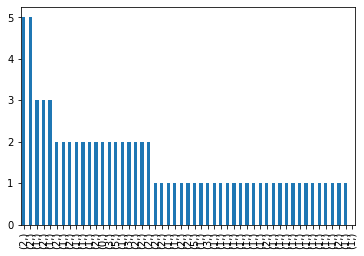

In [10]:
pd.Series([5, 5, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], index=[market_list]).plot.bar()

From the results, the best neighborhoods are Monroeville and West Mifflin (4 grocery stores each), followed by Marshall Township, Bloomfield, and East Liberty (3 grocery stores each).

Limitations of this dataset include the faulty data, which caused me to manually analyze and tally the amount of supermarkets in each neighborhood. Similarily, the dataset was faulty including addresses for places like "Pizza Hut" and private residences that are not grocery stores. These faulty data needed sorting out.

## Walkability

this metric details each neighborhoods individual walkability score on a scale from 0 - 100 

*the below code will allow me to seperate the data based on the census tract numbers and determine the mean walk score in pittsburgh*

*this is important information to have because it gives you a frame of reference when thinking about what a good walkscore would be.  The mean walk score in pittsburgh is about a 42, which is very low, meaning that some neighborhoods have very low walk scores and thus would provide no options for those who do not wish to take public transportation or don't own a car.  This just makes the neighborhoods with high walk scores that much better in comparison*

In [1]:
import pandas as pd

# import the data frame and assign it to "walk_scores"
walk_scores = pd.read_csv("https://data.wprdc.org/datastore/dump/682b1df1-a63b-4413-9362-ba077af63baa",
                         index_col = "Census Tract")

# import the data frame and assign it to "census_number"
census_number = pd.read_csv("https://data.wprdc.org/datastore/dump/682b1df1-a63b-4413-9362-ba077af63baa",
                           index_col = "Walk Score")

# display the first 5 rows of the data set
walk_scores.mean()

Walk Score    42.330846
dtype: float64

*this will create a bar graph displaying all of the highest walkability scores and their respective census tracts*

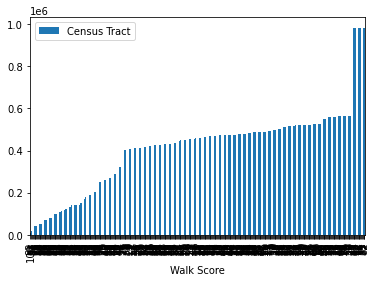

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# import the data frame and assign it to "walk_scores"
walk_scores = pd.read_csv("https://data.wprdc.org/datastore/dump/682b1df1-a63b-4413-9362-ba077af63baa",
                         index_col = "Census Tract")

# import the data frame and assign it to "census_number"
census_number = pd.read_csv("https://data.wprdc.org/datastore/dump/682b1df1-a63b-4413-9362-ba077af63baa",
                           index_col = "Walk Score")

census_number.plot(kind = "bar") # create a bar graph based on the census tract data

*there were a few limitations with the way this data was presented, one being that the data uses the census tract numbers in order to define locations instead of street addresses, which were hard to back track and find which neighborhood corresponded to which number*

## Conclusion

Using the above data, we were able to determine the best neighobrhood by liveability is **Downtown Pittsburgh (Central Business District)**

In order to determine this we ranked each metric in terms of importance, with supermarkets being deemed the most important, followed by walkability, and then community garden access. For each metric we took the top 5 neighborhoods and scored them on scales from 1 to 5, with the first best neighborhood getting 5 points and the fifth best neighborhood getting 1 point. Then we took this score and muliplied it by the metric's weight, so each neighborhood in supermarket's top list was multiplied by 3, each in walkability by 2, and in community gardens by 1. This work produced the following results:


**SUPERMARKET (x3, most important metric)**

Monroeville - 5 x 3 = 15

West Mifflin - 5 x 3 = 15

Marshall Township - 3 x 3 = 9

Bloomfield - 3 x 3 = 9

East Liberty - 3 x 3 = 9

*NOTE: Monroeville + West Mifflin as well as  Marshall Township + Bloomfield + East Liberty receive the same score, tied positions


**WALKABILITY (x2, 2nd most important metric)**

Downtown Pittsburgh - 5 x 2 = 10

Central oakland - 4 x 2 = 8

Friendship - 4 x 2 = 8

Bloomfield - 2 x 2 = 4

North Oakland - 2 x 2 = 4

*NOTE: Central Oakland + Friendship receive the same score as well as Bloomfield + North Oakland, tied positions


**COMMUNITY GARDENS (x1)**

Downtown Pittsburgh - 5 x 1 = 5

East Liberty - 4 x 1 = 4

Crafton - 3 x 1 = 3

Squirrel Hill - 2 x 1 = 2

Fox Chapel - 1 x 1 = 1


**OVERALL:**

**Downtown = 15** *preference because inside Pittsburgh City Limits

Monroeville = 15

West Mifflin = 15

Marshall Township = 9

Bloomfield = 13

East Liberty = 13

Central Oakland = 8

Friendship = 8

North Oakland = 4

Crafton = 3

Squirrel Hill = 2

Fox Chapel = 1
